# Import Basic Tools

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Import Data


In [13]:
train_data=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

## Check for null values

In [14]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Split Data into features and Labels

In [15]:
x=train_data.drop(['PassengerId','Survived'],axis=1)
y=train_data['Survived']


In [16]:
print(x.describe())
print(x.shape)

           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200
(891, 10)


## Checking the information of the feature data

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


 Droping few features since these features doesn't make much impact 

In [18]:
x=x.drop(['Ticket','Cabin'],axis=1)

In [19]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


creating new column naming it as title and filling it with title of each person from name

In [20]:
x['Title'] = x['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


Droping a name column

In [22]:
x=x.drop('Name',axis=1)

In [23]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


filling misiing values of ages as median of ages

In [24]:
x['Age']=x['Age'].fillna(x['Age'].median())

Counting the most repeated values in Embarked so as to fill the missing values in that column

In [25]:
x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
x['Embarked']=x['Embarked'].fillna('S')

Checking whether is there any null values present in feature dataset

In [27]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

Cleaning the title column 

In [28]:
len(x['Title'].value_counts())

17

Mapping a title column with a numbers so as to convert str into int

In [29]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
x['Title'] = x['Title'].map(title_mapping)

In [30]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,2
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,2
4,3,male,35.0,0,0,8.0500,S,0


Converting the remaining object column to int

In [31]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
x['Sex']=la.fit_transform(x['Sex'])

In [32]:
embarked_mapping={'S':1,'C':0,'Q':1}
x['Embarked']=x['Embarked'].map(embarked_mapping)

In [33]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,0,2
2,3,0,26.0,0,0,7.9250,1,1
3,1,0,35.0,1,0,53.1000,1,2
4,3,1,35.0,0,0,8.0500,1,0


In [34]:
x.head(),y.head()

(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
 0       3    1  22.0      1      0   7.2500         1      0
 1       1    0  38.0      1      0  71.2833         0      2
 2       3    0  26.0      0      0   7.9250         1      1
 3       1    0  35.0      1      0  53.1000         1      2
 4       3    1  35.0      0      0   8.0500         1      0, 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

# Classification Models

## Import all the classification Models

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


## Using a feature scaling technique

In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)

Using cross_val_score method on all the models

## Logistic Regression model

In [46]:
np.random.seed(1)
log_clf=LogisticRegression()
scoring='accuracy'
score=cross_val_score(log_clf,x,y,scoring=scoring,cv=5)
log_reg_score=np.mean(score)
print(score)
print(f'Logistic Regression model score: {log_reg_score}')

[0.81005587 0.80898876 0.78651685 0.80898876 0.84269663]
Logistic Regression model score: 0.8114493754315486


## KNeighbors model

In [48]:
np.random.seed(2)
kn_clf=KNeighborsClassifier()
score=cross_val_score(kn_clf,x,y,cv=5,scoring=scoring)
knn_score=np.mean(score)
print(score)
print(f'KNeighbors model Score: {knn_score}')


[0.82122905 0.78651685 0.83146067 0.84831461 0.8258427 ]
KNeighbors model Score: 0.8226727763480006


## SGD Classifier

In [49]:
np.random.seed(3)
sgd_clf=SGDClassifier()
score=cross_val_score(sgd_clf,x,y,scoring=scoring,cv=5)
sgd_score=np.mean(score)
print(score)
print(f'SGD Classifier Model Score: {sgd_score}')

[0.77094972 0.79213483 0.74157303 0.76966292 0.80898876]
SGD Classifier Model Score: 0.7766618542464379


## Kernel SVC Model

In [50]:
np.random.seed(3)
kernel_svc_clf=SVC()
score=cross_val_score(kernel_svc_clf,x,y,scoring=scoring,cv=5)
kernel_svc_score=np.mean(score)
print(score)
print(f'Kernel SVC Model Score: {kernel_svc_score}')

[0.84357542 0.81460674 0.82022472 0.80898876 0.85955056]
Kernel SVC Model Score: 0.8293892411022534


## SVC Model

In [51]:
np.random.seed(4)
svc_clf=SVC(kernel='linear')
score=cross_val_score(svc_clf,x,y,scoring=scoring,cv=5)
svc_score=np.mean(score)
print(score)
print(f'SVC Model Score: {svc_score}')

[0.83240223 0.80898876 0.80898876 0.79213483 0.8258427 ]
SVC Model Score: 0.8136714581633294


## Naive Model

In [52]:
np.random.seed(5)
gau_clf=GaussianNB()
score=cross_val_score(gau_clf,x,y,scoring=scoring,cv=5)
gau_score=np.mean(score)
print(score)
print(f'Naive Model Score: {gau_score}')

[0.78212291 0.78651685 0.80898876 0.79775281 0.82022472]
Naive Model Score: 0.7991212102190697


## Decision Tree

In [53]:
np.random.seed(6)
tree_clf=DecisionTreeClassifier()
score=cross_val_score(tree_clf,x,y,scoring=scoring,cv=5)
tree_score=np.mean(score)
print(score)
print(f'Decision Tree Model Score: {tree_score}')

[0.7877095  0.76404494 0.84831461 0.73595506 0.79213483]
Decision Tree Model Score: 0.7856317870817902


## Random Forest

In [54]:
np.random.seed(7)
random_clf=RandomForestClassifier()
score=cross_val_score(random_clf,x,y,scoring=scoring,cv=5)
random_score=np.mean(score)
print(score)
print(f'Random Forest Model SCore:{random_score}')

[0.77653631 0.79775281 0.83146067 0.7752809  0.83146067]
Random Forest Model SCore:0.8024982738057874


## XG Boost

In [55]:
np.random.seed(8)
xg_clf=XGBClassifier()
score=cross_val_score(xg_clf,x,y,scoring=scoring,cv=5)
xg_score=np.mean(score)
print(score)
print(f'XG Boost Model Score: {xg_score}')

[0.82122905 0.8258427  0.84831461 0.8258427  0.8258427 ]
XG Boost Model Score: 0.8294143493817087


In [72]:

score_df=pd.DataFrame({'models':['Logistic Regression','KNN','SGD','Kernel svc','SVC','Naive','Decision Tree','Random Forest','XG Boost'],'scores':[log_reg_score,knn_score,sgd_score,kernel_svc_score,svc_score,gau_score,tree_score,random_score,xg_score]})
dup_Score_df=score_df.copy()
score_df

                      


,models,scores
0,Logistic Regression,0.811449
1,KNN,0.822673
2,SGD,0.776662
3,Kernel svc,0.829389
4,SVC,0.813671
5,Naive,0.799121
6,Decision Tree,0.785632
7,Random Forest,0.802498
8,XG Boost,0.829414


The best Model is models    XG Boost
scores    0.829414
Name: 8, dtype: object


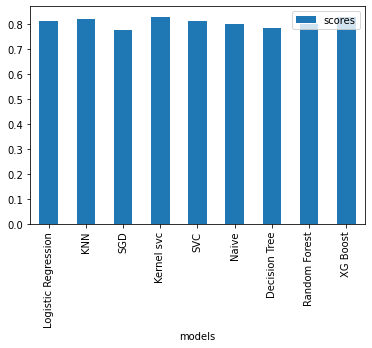

In [75]:
dup_Score_df.set_index('models').plot(kind='bar');
high_Score_index=score_df['scores'].argmax()
print(f'The best Model is {score_df.iloc[high_Score_index]}')

As per the above visual the best is XG Boost 

# Using a Hyperparameter tuning on a best performed model

In [76]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


For this using GridSearchcv method

In [77]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_clf=GridSearchCV(xg_clf,params,cv=5,verbose=2)
grid_clf.fit(x,y)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6

[Parallel(n_jobs=1)]: Done 19200 out of 19200 | elapsed: 16.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...t=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1,

## Getting the best parameters after training  on GridSearchcv

In [ ]:
grid_clf.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 7}

In [ ]:
# xg_clf.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Test Data

In [78]:
test_data=pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Preprocessing the test Data

In [81]:
def data_preprocessing(data):
  x=test_data.drop('PassengerId',axis=1)
  x=x.drop(['Ticket','Cabin'],axis=1)
  x['Title'] = x['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  x=x.drop('Name',axis=1)
  x['Age']=x['Age'].fillna(x['Age'].median())
  x['Embarked']=x['Embarked'].fillna('S')
  x['Fare']=x['Fare'].fillna(x['Fare'].median())
  x['Title'] = x['Title'].map(title_mapping)
  x['Sex']=la.transform(x['Sex'])
  x['Embarked']=x['Embarked'].map(embarked_mapping)
  x=std.transform(x)
  return x






In [82]:
x_test=data_preprocessing(test_data)

## Predicting the test data using grid Search cv model after Tuning

In [ ]:
y_pred=grid_clf.predict(x_test)

In [ ]:
submission=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':y_pred})

# Ready for Submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/titanic/final_submission_report.csv',index=False)